For this project, me, Muhammad bin Hanifah Syukri, mjh7412, will conduct a full data analysis, along with python coding and explanation for the codes through Jupyter Notebook. My data title that I will breakdown in detail about is:


"Analyzing Survival Factors in the Titanic Tragedy Using Python"

-----------------------------------------------------------------------------



Lets get going for the first step for this data;

This step is called Data Loading and Familiarization where it load the dataset into a Pandas DataFrame and display the first few rows and general statistics.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced visualizations

data = pd.read_csv('titanic.csv')
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

This second step involves data cleaning and handle missing values:

*   Fill missing values for the "Age" column with the median age.
*   Drop rows with missing "Embarked" values.


In [2]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

<ipython-input-2-d3230a97a3df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Convert "Sex" and "Embarked" to numeric codes for easier analysis. For this data, I convert the male victim to a numeric number (0) and the female, to a numeric number (1)

Created a "FamilySize" column representing the total number of relatives that were onboard.

In [15]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

data['FamilySize'] = data['SibSp'] + data['Parch']

This 2 lines of codes is me calculating the overall survival rate.

All the numbers are already in the raw data set that I got from the github/pandas

In [16]:
overall_survival_rate = data['Survived'].mean()
print(f"Overall survival rate: {overall_survival_rate * 100:.2f}%")

Overall survival rate: 38.38%


This code allows me to show a visualization of the survival distribution
through creating a Histogram and a Bar Graph for a better understanding about the survival rates by Passenger Class.


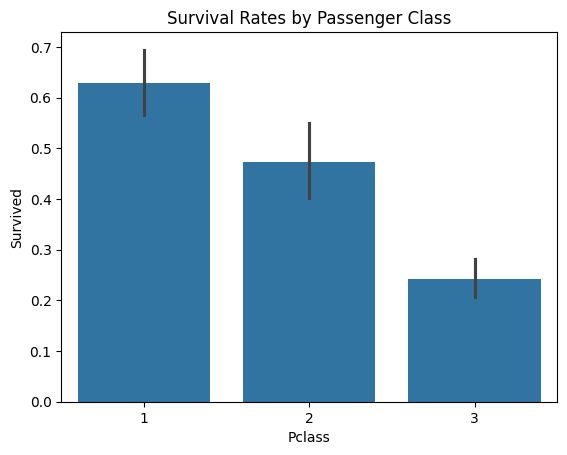

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rates by Passenger Class')
plt.show()

One of the project requirement was to derive insight(s) using answers to my questions. Here is one of the insight that I'm interested in which is;

1. Survival rate by gender (from before, I put male as numberic number 0 and female as numeric number 1)

In [18]:
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


Another insight I got from the dataset of titanic is;

2. Survival rate by Age Class

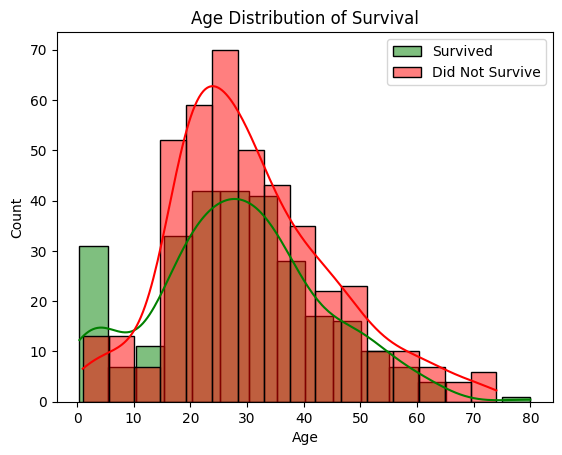

In [19]:
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived', color='green')
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Did Not Survive', color='red')
plt.legend()
plt.title('Age Distribution of Survival')
plt.show()

This section is for compelling narrative explaining:

The tragedy and relevance of the dataset.
Key findings for each question (e.g., "Women had a survival rate of 74%, much higher than men at 19%").
Derive actionable insights (e.g., socio-economic patterns of survival)

One of the project requirement is questions regarding the issue. My first question is;

Did traveling alone impact survival rates?

In [20]:
data['IsAlone'] = (data['FamilySize'] == 0).astype(int)
survival_by_alone = data.groupby('IsAlone')['Survived'].mean()
print("\nSurvival Rates by Traveling Alone:")
print(survival_by_alone)


Survival Rates by Traveling Alone:
IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


For this section, I created another histogram, but this time, I insert a color for each class of passenger with their survival rate.

1. The first class passenger = Blue color bar with approximately 0.62 percentage of survival rate
2. The second class passenger with a grey color bar going for below than 0.5 survival rate.
3. The third class passenger with a brown bar color with a low survival rate of 0.24.



<ipython-input-22-b33780e24965>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')


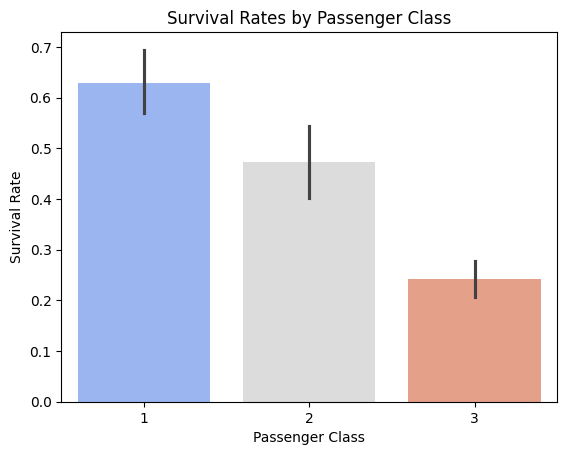

In [22]:
sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

I can also change the color of the graph to make it more visual appealing.
Instead of going for a cool tone color, I can change the palette a bit to be a darker and more striking color. As example;

1. Dark Blue = 1st-Class Passenger
2. Turqoise = 2nd-Class Passenger
3. Light Green = 3rd-Class Passenger

<ipython-input-25-48bc68f368f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='viridis')


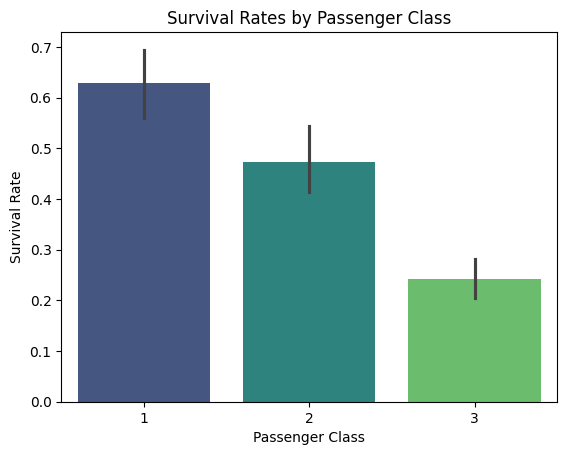

In [25]:
# Bar plot for survival rates by passenger class
sns.barplot(x='Pclass', y='Survived', data=data, palette='viridis')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Enough example for survival rates by passenger class.

Now, I will move on to the next bar graph of a bigger audience, which is a visual graph for the survival rate against every age group.

As you can see from the picture below, there is a bar graph and there is also a histogram line showing the different age groups and theie data. Starting from the leftmost group; 20 years and below, the middle group; 21-40, and last but not least, the rightmost group; 41 untill 80 years old.


-----------------------------------------------------------------------------


I also add the color for the graph to make the audience understand the graph more instead of just using the same color tone. I used the python code:

sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived', color='green')
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Did Not Survive', color='red')

Other than that, I also insert a label at the right top of the graph picture.



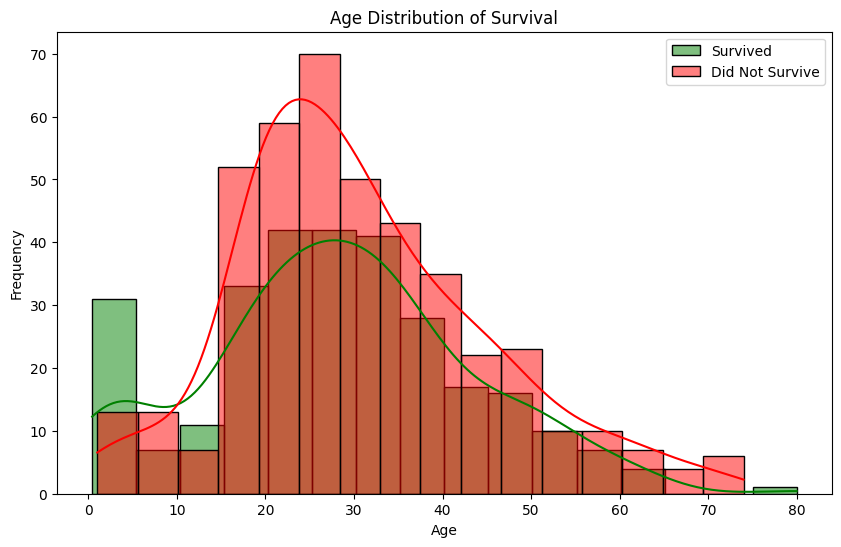

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived', color='green')
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Did Not Survive', color='red')
plt.title('Age Distribution of Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We can see from the graph, the group that has the most survivors was the middle group with a high of more than 40 survivors. There are also a small number of the older age which is 70-80 years old.

-------------------------------------------------------------------------------
Despite having the highest number of survivor, the middle group also is the highest number of not survived members with the highest of 70 people.

Survival by Family Size

Smaller families tend to have higher survival rates, as seen in both the visualization and summary statistics.


<ipython-input-27-14c574aa7d29>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=data, palette='Blues')


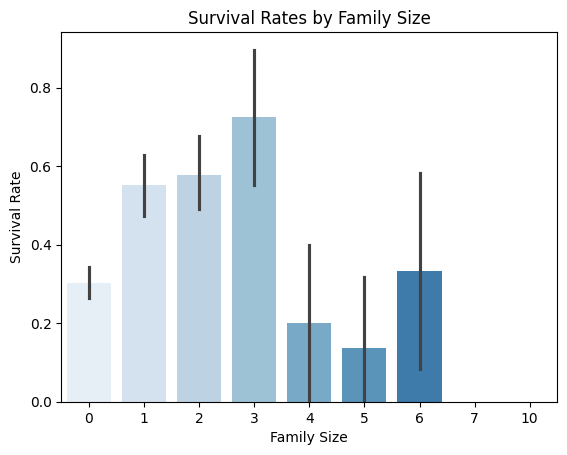


Survival Rates by Family Size:
FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


In [27]:
sns.barplot(x='FamilySize', y='Survived', data=data, palette='Blues')
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Insights from family size
print("\nSurvival Rates by Family Size:")
print(data.groupby('FamilySize')['Survived'].mean())

The third graph visualization that I want to do is the survival rates according to the embarkation point (ship starting point).

There are three embarkation points that were mentioned in the data;

marked with 0 = Cherbourg with the highest survival rates of 0.55
marked with 1 = Queenstown with survival rates of 0.4
makred with 2 = Southampton, survival rates of 0.34

These three points were colored with different colors to easily differentiate each one of them.

<ipython-input-30-3a5dda896cda>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, palette='autumn', )


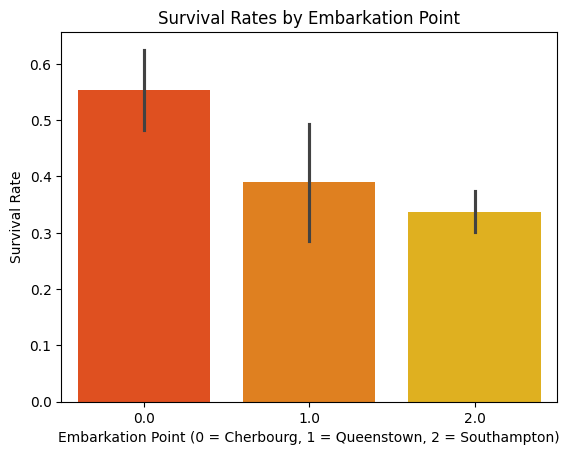


Survival Rates by Embarkation Point:
Embarked
0.0    0.553571
1.0    0.389610
2.0    0.336957
Name: Survived, dtype: float64


In [30]:
sns.barplot(x='Embarked', y='Survived', data=data, palette='autumn', )
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point (0 = Cherbourg, 1 = Queenstown, 2 = Southampton)')
plt.ylabel('Survival Rate')
plt.show()

# Insights from embarkation point
print("\nSurvival Rates by Embarkation Point:")
print(data.groupby('Embarked')['Survived'].mean())

These are the key insights throughout the entire titanic data that I had explored above.

In [33]:
print("\nKey Insights:")

print("1. Overall survival rate is {:.2f}%.".format(overall_survival_rate * 100))
print("2. Women were significantly more likely to survive than men.")
print("3. Passengers in 1st class had the highest survival rates.")
print("4. Younger passengers and those with smaller families had better survival outcomes.")
print("5. Embarkation point influenced survival, with highest rates from Cherbourg, followed by Queenstown, and Southampton.")


Key Insights:
1. Overall survival rate is 38.38%.
2. Women were significantly more likely to survive than men.
3. Passengers in 1st class had the highest survival rates.
4. Younger passengers and those with smaller families had better survival outcomes.
5. Embarkation point influenced survival, with highest rates from Cherbourg, followed by Queenstown, and Southampton.
